In [53]:
import pandas as pd

In [54]:
movies = pd.read_csv('data/title.basics.csv')

In [55]:
# get the db with movies and their genres
movies.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [56]:
movies.shape

(146144, 6)

In [57]:
ratings = pd.read_csv('data/title.ratings.csv')

In [58]:
# get the db with the ratings and number of votes
ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [59]:
ratings.shape

(73856, 3)

In [60]:
# get the db with the movie regions
regions = pd.read_csv('data/title.akas.csv')

In [61]:
regions.region.unique()

array(['BG', 'JP', 'BR', 'FR', 'GR', 'IT', 'HR', 'IL', 'MX', 'EE', 'SE',
       'US', 'DE', 'XWW', 'LV', 'PT', 'RU', 'CZ', 'CA', 'CL', 'RO', 'LT',
       'FI', 'PE', 'TR', 'NO', 'SI', 'UA', 'VN', 'DK', 'RS', 'SK', nan,
       'ES', 'HU', 'PL', 'AZ', 'GE', 'UY', 'AR', 'GB', 'IN', 'CO', 'AU',
       'IE', 'AT', 'CN', 'KR', 'BA', 'VE', 'CH', 'DO', 'XEU', 'NL', 'BO',
       'JM', 'IR', 'XSA', 'MK', 'ID', 'TW', 'PH', 'TH', 'HK', 'PR', 'BE',
       'CU', 'AL', 'AN', 'EG', 'SG', 'IS', 'QA', 'NZ', 'AM', 'TN', 'MY',
       'SD', 'ZW', 'PS', 'MN', 'NG', 'SV', 'MA', 'BZ', 'UZ', 'AE', 'KP',
       'GH', 'PA', 'LU', 'ZA', 'CD', 'NP', 'LB', 'IQ', 'MH', 'EC', 'JO',
       'SN', 'BY', 'ET', 'PK', 'KZ', 'GP', 'ME', 'LK', 'DZ', 'VI', 'HN',
       'KH', 'CY', 'BD', 'AF', 'GT', 'XNA', 'CSHH', 'TT', 'SUHH', 'BH',
       'CV', 'PG', 'GU', 'TZ', 'MU', 'CR', 'PY', 'XKV', 'UG', 'AW', 'XAS',
       'BT', 'KE', 'SL', 'MD', 'RW', 'SY', 'BS', 'HT', 'MG', 'LA', 'MO',
       'MM', 'MW', 'SZ', 'AO', 'CG', 'KG', 'LR',

In [62]:
# it seems most movies are US, and then XWW is worldwide.
regions.region.value_counts().rename_axis('region').reset_index(name='counts').head(15)

,region,counts
0,US,51490
1,XWW,18467
2,RU,13817
3,DE,11634
4,FR,10990
5,ES,9007
6,GB,8942
7,CA,8871
8,PL,8691
9,IN,8435


In [63]:
# limit my analysis to US movies
us_movies = regions.loc[(regions.region == 'US')]

In [64]:
us_movies

,title_id,ordering,title,region,language,types,attributes,is_original_title
12,tt0369610,21,Jurassic World 3D,US,NaN,NaN,3-D version,0.0
20,tt0369610,29,Jurassic World,US,NaN,NaN,NaN,0.0
21,tt0369610,2,Ebb Tide,US,NaN,NaN,fake working title,0.0
28,tt0369610,36,Jurassic Park IV,US,NaN,working,NaN,0.0
37,tt0369610,44,Jurassic Park 4,US,NaN,NaN,informal alternative title,0.0
...,...,...,...,...,...,...,...,...
331645,tt9310460,6,Coconut the Little Dragon 2 Into the Jungle,US,NaN,imdbDisplay,NaN,0.0
331654,tt9358044,2,Hail Satan?,US,NaN,imdbDisplay,NaN,0.0
331673,tt9562694,5,Alien Warfare,US,NaN,imdbDisplay,NaN,0.0
331686,tt9705860,1,Dusan Vukotic Croatian Oscar Winner,US,NaN,imdbDisplay,NaN,0.0


In [65]:
# merge the movie titles with the ratings
rated_movies = pd.merge(movies, ratings)

In [66]:
rated_movies.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [67]:
rated_movies.shape

(73856, 8)

In [68]:
# merge the other db in order to limit the movies to US region
us_rated = rated_movies.merge(us_movies, left_on="primary_title", right_on="title")

In [69]:
us_rated.shape

(33487, 16)

In [70]:
us_rated.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'title_id',
       'ordering', 'title', 'region', 'language', 'types', 'attributes',
       'is_original_title'],
      dtype='object')

In [71]:
# filter out unwanted columns 
us_rated = us_rated.filter(['title', 'genres', 'numvotes', 'averagerating'])

In [72]:
us_rated.head(20)

,title,genres,numvotes,averagerating
0,The Other Side of the Wind,Drama,4517,6.9
1,Bigfoot,"Horror,Thriller",32,4.1
2,Bigfoot,"Horror,Thriller",32,4.1
3,Bigfoot,"Horror,Thriller",32,4.1
4,Bigfoot,"Action,Horror",9,4.6
5,Bigfoot,"Action,Horror",9,4.6
6,Bigfoot,"Action,Horror",9,4.6
7,Bigfoot,"Animation,Family",55,2.5
8,Bigfoot,"Animation,Family",55,2.5
9,Bigfoot,"Animation,Family",55,2.5


In [73]:
# there seems to be a fair number of duplicates. Drop them. Add other criteria to make sure I'm keeping different movies
# which happen to have the same title
us_rated = us_rated.drop_duplicates(subset=["title", "genres", "numvotes"])

In [74]:
us_rated.head()

,title,genres,numvotes,averagerating
0,The Other Side of the Wind,Drama,4517,6.9
1,Bigfoot,"Horror,Thriller",32,4.1
4,Bigfoot,"Action,Horror",9,4.6
7,Bigfoot,"Animation,Family",55,2.5
10,Cooper and Hemingway: The True Gen,Documentary,53,7.6


In [75]:
# many movies have few votes, only 5
us_rated.sort_values(by=["numvotes"], ascending = True).head()

,title,genres,numvotes,averagerating
27097,Free Spaces,Documentary,5,9.0
26041,The Rise of Enduro,Documentary,5,7.4
28442,Loves Park,Drama,5,8.4
15800,El Cap Report,"Adventure,Documentary,Sport",5,7.4
10141,Fake Blood,Comedy,5,6.8


In [76]:
# other movies have 100,000+ votes
us_rated.sort_values(by=["numvotes"], ascending = False).head()

,title,genres,numvotes,averagerating
2650,Inception,"Action,Adventure,Sci-Fi",1841066,8.8
375,Interstellar,"Adventure,Drama,Sci-Fi",1299334,8.6
10186,Django Unchained,"Drama,Western",1211405,8.4
421,The Avengers,"Action,Adventure,Sci-Fi",1183655,8.1
616,The Wolf of Wall Street,"Biography,Crime,Drama",1035358,8.2


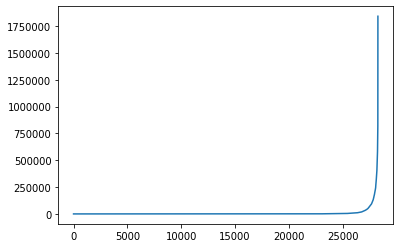

In [77]:
# but most movies don't have that many votes
numvotes = us_rated.numvotes.tolist()
numvotes.sort()

import matplotlib.pyplot as plt
plt.plot(numvotes)
plt.show()

In [78]:
# testing to see where the range of numvotes are
def divide_list(list, num1, num2):
    new_list = []
    for x in list:
        if (x > num1) & (x < num2):
            new_list.append(x)
    return new_list

In [79]:
us_rated.shape

(28268, 4)

In [80]:
len(divide_list(numvotes, 20000, 28268))

184

In [81]:
len(divide_list(numvotes, 10000, 20000))

543

In [82]:
len(divide_list(numvotes, 5000, 10000))

693

In [83]:
len(divide_list(numvotes, 1000, 2000000))

5259

In [84]:
# almost 900 movies have only five votes
us_rated.loc[us_rated.numvotes == 5]

,title,genres,numvotes,averagerating
549,Robin Hood,NaN,5,7.6
588,Fair Game,Documentary,5,8.2
646,The Door,"Action,Drama,Thriller",5,7.4
782,Wasteland,"Comedy,Drama",5,8.2
1195,Lucky,Comedy,5,5.6
...,...,...,...,...
33278,Sealed Lips,Drama,5,7.6
33352,Young Men and Fire,Documentary,5,6.8
33416,Happy Together,"Comedy,Drama",5,6.2
33417,Virgin Genocide,Horror,5,3.2


In [85]:
# a fair amount over over 100
len(us_rated.loc[us_rated.numvotes > 100])

12274

In [86]:
# I'll redefine table to have only movies with numvotes > 100. Don't want little watched movies to count
us_rated = us_rated.loc[us_rated.numvotes > 100]

In [87]:
us_rated = us_rated.sort_values(by=["numvotes"], ascending = False)

In [88]:
us_rated.head()

,title,genres,numvotes,averagerating
2650,Inception,"Action,Adventure,Sci-Fi",1841066,8.8
375,Interstellar,"Adventure,Drama,Sci-Fi",1299334,8.6
10186,Django Unchained,"Drama,Western",1211405,8.4
421,The Avengers,"Action,Adventure,Sci-Fi",1183655,8.1
616,The Wolf of Wall Street,"Biography,Crime,Drama",1035358,8.2


In [89]:
# start working on isolating the genres
us_rated.iloc[0].genres

'Action,Adventure,Sci-Fi'

In [90]:
us_rated.iloc[0].genres.split(',')[0]

'Action'

In [92]:
# get rid of any movies with NaN
us_rated.dropna(inplace = True)

In [93]:
# define function to split the genre codes 
def split_genres(string):
    genres = list(string.split(','))
    new_list = []
    for genre in genres:
        new_list.append(genre)
    return new_list

In [94]:
# testing function 
split_genres(us_rated.iloc[0].genres)

['Action', 'Adventure', 'Sci-Fi']

In [95]:
# populating new DF using nested for loop
genre_pop = pd.DataFrame()
columns = ['title', 'genre', 'numvotes', 'averagerating']
for i in range(len(us_rated)):
# for i in range(10):
    genres = split_genres(us_rated.iloc[i]['genres'])
    for j in range(len(genres)):
        title = us_rated.iloc[i]['title']
        numvotes = us_rated.iloc[i]['numvotes']
        genre = genres[j]
        averagerating = us_rated.iloc[i]['averagerating']
        values = [title, genre, numvotes, averagerating]
        zipped = zip(columns, values)
        to_append = dict(zipped)
        genre_pop = genre_pop.append(to_append, True)
genre_pop.head()

,averagerating,genre,numvotes,title
0,8.8,Action,1841066.0,Inception
1,8.8,Adventure,1841066.0,Inception
2,8.8,Sci-Fi,1841066.0,Inception
3,8.6,Adventure,1299334.0,Interstellar
4,8.6,Drama,1299334.0,Interstellar


In [96]:
# in this df, every genre has its own row 
genre_pop.shape

(25402, 4)

In [97]:
# sorting by rating
genre_pop = genre_pop.sort_values(by=["averagerating"], ascending = False)
genre_pop.head(20)

,averagerating,genre,numvotes,title
6498,9.7,Drama,5600.0,Once Upon a Time ... in Hollywood
6497,9.7,Comedy,5600.0,Once Upon a Time ... in Hollywood
12973,9.5,Documentary,829.0,"Hare Krishna! The Mantra, the Movement and the..."
14438,9.5,Documentary,617.0,Mosul
5251,9.4,Drama,9629.0,Peranbu
24545,9.4,Documentary,114.0,Jurisdiction
23552,9.4,Documentary,132.0,Harvesting the High Plains
24543,9.4,Action,114.0,Jurisdiction
24544,9.4,Comedy,114.0,Jurisdiction
21297,9.4,Documentary,192.0,"The Nagano Tapes: Rewound, Replayed & Reviewed"


In [98]:
# finding the genres with the highest ratings
genre_pop.groupby("genre").mean().sort_values(by="averagerating", ascending=False).reset_index()

,genre,averagerating,numvotes
0,News,7.169565,1191.318841
1,Documentary,7.011667,1598.099462
2,Biography,6.874603,25873.285714
3,History,6.772864,14796.798995
4,Music,6.615497,12048.976608
5,Sport,6.574583,12256.687500
6,Animation,6.131742,38564.070225
7,Musical,6.031461,11599.011236
8,War,5.976389,12965.111111
9,Drama,5.965082,17453.756380


# Best Rated Genres
According to the dataframe above, the genres with the highest ratings are
- News
- Documentary
- Biography
- History
- Music

Even though these are well reviewed movies, the dictionary below shows the most made genres are:
- Drama
- Comedy
- Thriller
- Horror
- Documentary
- Action

which means that general audiences gravitate to these genres more.


In [106]:
genre_pop.genre.value_counts().to_dict()

{'Drama': 5447,
 'Comedy': 3081,
 'Thriller': 2404,
 'Horror': 2229,
 'Documentary': 1860,
 'Action': 1775,
 'Romance': 1271,
 'Crime': 1237,
 'Adventure': 1037,
 'Mystery': 826,
 'Sci-Fi': 743,
 'Biography': 693,
 'Family': 559,
 'Fantasy': 508,
 'History': 398,
 'Animation': 356,
 'Music': 342,
 'Sport': 240,
 'War': 144,
 'Western': 91,
 'Musical': 89,
 'News': 69,
 'Reality-TV': 1,
 'Game-Show': 1,
 'Adult': 1}

### Now figure out 'enthusiasm'

In [166]:
# define the above as a dictonary
num_movies = genre_pop.genre.value_counts().to_dict()

In [167]:
# delete those with only one instance
del num_movies['Reality-TV']
del num_movies['Game-Show']
del num_movies['Adult']

In [168]:
# reverse dictionary so I can merge it with ranked_genres
num_movies = dict(map(reversed, num_movies.items()))
num_movies

{5447: 'Drama',
 3081: 'Comedy',
 2404: 'Thriller',
 2229: 'Horror',
 1860: 'Documentary',
 1775: 'Action',
 1271: 'Romance',
 1237: 'Crime',
 1037: 'Adventure',
 826: 'Mystery',
 743: 'Sci-Fi',
 693: 'Biography',
 559: 'Family',
 508: 'Fantasy',
 398: 'History',
 356: 'Animation',
 342: 'Music',
 240: 'Sport',
 144: 'War',
 91: 'Western',
 89: 'Musical',
 69: 'News'}

In [169]:
# sort ranked_genre by numvotes
ranked_genres = genre_pop.groupby("genre").sum().sort_values(by="numvotes", ascending=False).reset_index()
ranked_genres

,genre,averagerating,numvotes
0,Drama,32491.8,95070611.0
1,Action,9409.6,87800044.0
2,Adventure,5930.7,77608919.0
3,Comedy,17322.9,62101462.0
4,Sci-Fi,3659.4,39647088.0
5,Thriller,12234.6,38271975.0
6,Crime,7130.8,33647516.0
7,Fantasy,2744.5,23148847.0
8,Mystery,4491.1,21615559.0
9,Romance,7499.0,21282868.0


In [170]:
# drop the same unimportant genres as dropped in dictionary above 
ranked_genres = ranked_genres.drop([22, 23, 24])

In [171]:
# add dicionary to dataframe
ranked_genres['num_movies'] = num_movies

In [172]:
ranked_genres

,genre,averagerating,numvotes,num_movies
0,Drama,32491.8,95070611.0,5447
1,Action,9409.6,87800044.0,3081
2,Adventure,5930.7,77608919.0,2404
3,Comedy,17322.9,62101462.0,2229
4,Sci-Fi,3659.4,39647088.0,1860
5,Thriller,12234.6,38271975.0,1775
6,Crime,7130.8,33647516.0,1271
7,Fantasy,2744.5,23148847.0,1237
8,Mystery,4491.1,21615559.0,1037
9,Romance,7499.0,21282868.0,826


In [176]:
# create new column 'enthusiasm_score'
ranked_genres['enthusiasm_score'] = round(((ranked_genres['numvotes']/ranked_genres['num_movies'])/1000), 1)

In [177]:
enthusiasm = ranked_genres.sort_values(by='enthusiasm_score', ascending = False).set_index('genre')
enthusiasm

,averagerating,numvotes,num_movies,enthusiasm_score
genre,,,,
Adventure,5930.7,77608919.0,2404,32.3
Action,9409.6,87800044.0,3081,28.5
Comedy,17322.9,62101462.0,2229,27.9
Crime,7130.8,33647516.0,1271,26.5
Biography,4764.1,17930187.0,693,25.9
Horror,10150.2,19264041.0,743,25.9
Romance,7499.0,21282868.0,826,25.8
Animation,2182.9,13728809.0,559,24.6
Thriller,12234.6,38271975.0,1775,21.6


In [178]:
# getting rid of genres that have fewer than 150 made 
enthusiasm = enthusiasm[enthusiasm.num_movies >= 150]
enthusiasm

,averagerating,numvotes,num_movies,enthusiasm_score
genre,,,,
Adventure,5930.7,77608919.0,2404,32.3
Action,9409.6,87800044.0,3081,28.5
Comedy,17322.9,62101462.0,2229,27.9
Crime,7130.8,33647516.0,1271,26.5
Biography,4764.1,17930187.0,693,25.9
Horror,10150.2,19264041.0,743,25.9
Romance,7499.0,21282868.0,826,25.8
Animation,2182.9,13728809.0,559,24.6
Thriller,12234.6,38271975.0,1775,21.6


# Genres with most enthusiastic fans
Even if these genres don't necessarily get the highest ratings, they generate the most number of votes (good or bad) per film made. Therefore, Microsoft should look into making movies that have the most ardent fans. Top five are:
- Adventure
- Action
- Comedy
- Crime 
- Biography